In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv('dataset/modeling_data.csv')
df_final = pd.read_csv('dataset/bank_marketing_clean.csv')

In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [4]:
df_final['y'] = df_final['y'].apply(lambda x : 0 if x == 'no' else 1 )

In [5]:
var_num = df_final.select_dtypes(include=[np.number]).columns
var_cat = df_final.select_dtypes(include='object').columns

In [6]:
df_process = df.copy()

In [9]:
# selection des variables
selected_cols = ['duration', 'nr.employed', 'euribor3m', 'emp.var.rate', 'cons.conf.idx',
                 'campaign', 'cons.price.idx', 'contact_telephone', 'pdays', 'poutcome_success']

In [10]:
df_utils = df_process[selected_cols].copy()

In [11]:
inertia = []
silhouette_avg = []
db_index_avg = []

cluster_range = range(2,11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_utils.values)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score((df_utils.values), kmeans.labels_)
    silhouette_avg.append(silhouette)
    db_index = davies_bouldin_score((df_utils.values), kmeans.labels_)
    db_index_avg.append(db_index)

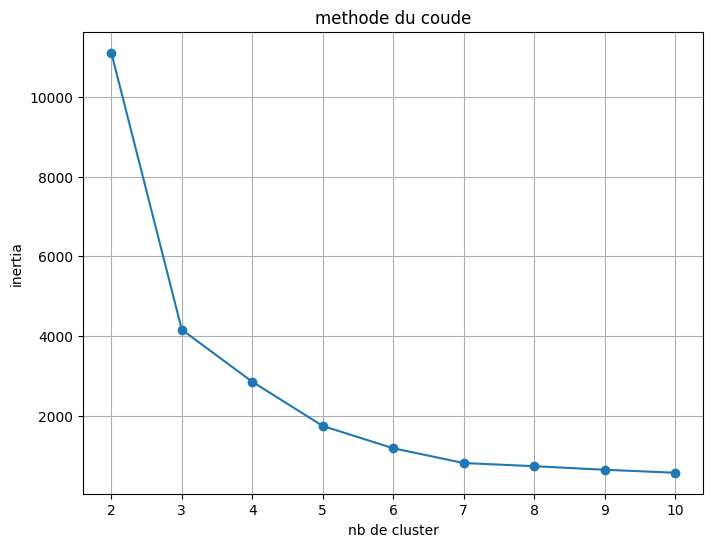

In [12]:
plt.figure(figsize= (8,6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('methode du coude')
plt.xlabel('nb de cluster')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

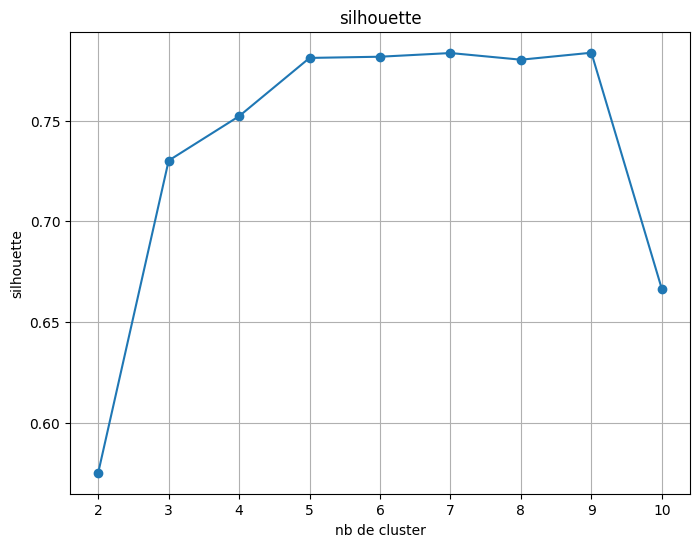

In [13]:
plt.figure(figsize= (8,6))
plt.plot(cluster_range, silhouette_avg, marker='o')
plt.title('silhouette')
plt.xlabel('nb de cluster')
plt.ylabel('silhouette')
plt.grid(True)
plt.show()

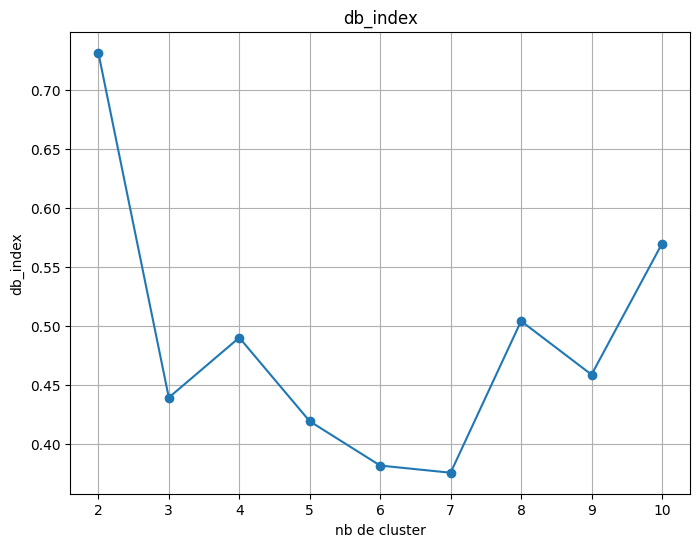

In [14]:
plt.figure(figsize= (8,6))
plt.plot(cluster_range, db_index_avg, marker='o')
plt.title('db_index')
plt.xlabel('nb de cluster')
plt.ylabel('db_index')
plt.grid(True)
plt.show()

In [15]:
# application de k-means avec k=6

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_utils.values)

df_final['cluster'] = kmeans.labels_
df_process['cluster'] = kmeans.labels_

In [16]:
silhouette_kmeans = silhouette_score((df_utils.values), kmeans.labels_)
db_index_kmeans = davies_bouldin_score((df_utils.values), kmeans.labels_)

silhouette_kmeans, db_index_kmeans

(0.7816986550330252, 0.3816374589174125)

In [17]:
# distribution des clusters
df_final['cluster'].value_counts()

cluster
2    13712
1    10927
0    10719
5     3219
3     1370
4     1229
Name: count, dtype: int64

In [27]:
#creation dataframe pour chaque cluster

cluster_0=df_final[df_final['cluster']==0]
cluster_1=df_final[df_final['cluster']==1]
cluster_2=df_final[df_final['cluster']==2]
cluster_3=df_final[df_final['cluster']==3]
cluster_4=df_final[df_final['cluster']==4]
cluster_5=df_final[df_final['cluster']==5]

c0_0=cluster_0[["y"]][(cluster_0[["y"]]==0)].count()
c0_1=cluster_0[["y"]][(cluster_0[["y"]]==1)].count()
c0=pd.concat([c0_0,c0_1],axis=1)

c1_0=cluster_1[["y"]][(cluster_1[["y"]]==0)].count()
c1_1=cluster_1[["y"]][(cluster_1[["y"]]==1)].count()
c1=pd.concat([c1_0,c1_1],axis=1)

c2_0=cluster_2[["y"]][(cluster_2[["y"]]==0)].count()
c2_1=cluster_2[["y"]][(cluster_2[["y"]]==1)].count()
c2=pd.concat([c2_0,c2_1],axis=1)

c3_0=cluster_3[["y"]][(cluster_3[["y"]]==0)].count()
c3_1=cluster_3[["y"]][(cluster_3[["y"]]==1)].count()
c3=pd.concat([c3_0,c3_1],axis=1)

c4_0=cluster_4[["y"]][(cluster_4[["y"]]==0)].count()
c4_1=cluster_4[["y"]][(cluster_4[["y"]]==1)].count()
c4=pd.concat([c4_0,c4_1],axis=1)

c5_0=cluster_5[['y']][(cluster_5[['y']]==0)].count()
c5_1=cluster_5[['y']][(cluster_5[['y']]==1)].count()
c5 = pd.concat([c5_0,c5_1], axis =1)

In [28]:
#dataframe pour afficher la ratio 'y' sur chaque cluster

tb=pd.concat([c0,c1,c2,c3,c4,c5],axis=0)
tb=tb.set_index([["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","cluster 5"]])

ratio=tb[1]/(tb[0]+tb[1])
tb=pd.concat([tb,ratio],axis=1)
tb.columns=["No","Yes","ratio/Conversion Rate"]
ratio_tb=pd.DataFrame(tb)

ratio_tb.sort_values('ratio/Conversion Rate', ascending = False)

,No,Yes,ratio/Conversion Rate
Cluster 3,476,894,0.652555
Cluster 1,8700,2227,0.203807
Cluster 4,1047,182,0.148088
Cluster 0,10082,637,0.059427
cluster 5,3059,160,0.049705
Cluster 2,13173,539,0.039309


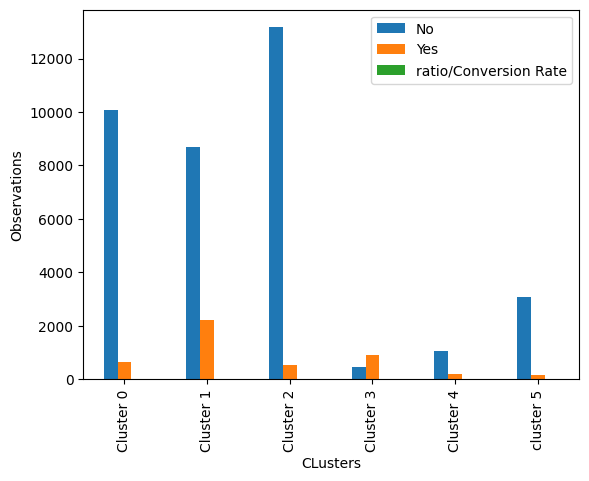

In [44]:
tb.plot(kind="bar")
plt.xlabel("CLusters")
plt.ylabel("Observations")
plt.show()

In [23]:
cluster_means = df_final.groupby('cluster')[var_num].mean()
cluster_mode = df_final.groupby('cluster')[var_cat].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan)

In [24]:
cluster_means

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
cluster,,,,,,,,,,,
0,40.029107,254.940573,2.974345,-1.000000,0.000000,1.400000,93.695748,-39.605346,4.963108,5228.100000,0.059427
1,39.423904,270.784845,2.072756,-0.864464,0.362497,-2.025716,92.977415,-43.299689,1.207286,5079.084845,0.203807
2,40.188448,251.737237,2.881053,-0.998906,0.003719,1.181877,94.109955,-38.747951,4.870759,5206.048476,0.039309
3,42.034307,321.126277,1.808029,5.591241,1.570073,-2.095620,93.334650,-38.380657,0.989602,5030.260730,0.652555
4,39.301058,210.975590,2.581774,-0.917819,0.251424,-2.043287,93.140950,-41.483238,1.095697,5058.282099,0.148088
5,40.761417,246.593663,1.879155,-1.000000,0.202547,-0.100062,93.199910,-42.001926,4.109534,5195.787884,0.049705


In [20]:
cluster_mode

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
cluster,,,,,,,,,,
0,admin.,married,university.degree,no,yes,no,cellular,jul,thu,nonexistent
1,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent
2,blue-collar,married,university.degree,no,no,no,telephone,may,fri,nonexistent
3,admin.,married,university.degree,no,yes,no,cellular,may,thu,success
4,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent
5,admin.,married,university.degree,no,yes,no,cellular,nov,thu,nonexistent


In [31]:
# Fonction pour tracer les 10 caractéristiques les plus importantes pour chaque cluster
def plot_top_features(cluster_data, cluster_num):
    # Séparation des caractéristiques et de la cible
    cluster_X = cluster_data.drop(['y', 'cluster'], axis=1)
    cluster_y = cluster_data['y']
    
    # Sélection des 20 meilleures caractéristiques avec f_classif
    fs = SelectKBest(score_func=f_classif, k=10)
    fs.fit_transform(cluster_X, cluster_y)
    
    # Extraction des scores et noms des caractéristiques sélectionnées
    selected_features = np.array(cluster_X.columns)[fs.get_support()]
    selected_scores = fs.scores_[fs.get_support()]
    
    # Création d'un DataFrame pour afficher les caractéristiques et leurs scores
    ftb = pd.DataFrame({"weight": selected_scores, "feature names": selected_features}).sort_values(by="weight", ascending=False)
    
    # Tracer les 20 caractéristiques les plus importantes
    plt.figure(figsize=(8, 6))
    plt.barh(ftb['feature names'], ftb['weight'], color='skyblue')
    plt.xlabel('Score (f_classif)')
    plt.ylabel('Feature Names')
    plt.title(f'Top 20 Features Most Significant in Cluster {cluster_num} Influencing y')
    plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher les scores les plus élevés en haut
    plt.tight_layout()
    plt.show()

In [32]:
# Extraction des données pour chaque cluster
c_0 = df_process[df_process['cluster'] == 0]
c_1 = df_process[df_process['cluster'] == 1]
c_2 = df_process[df_process['cluster'] == 2]
c_3 = df_process[df_process['cluster'] == 3]
c_4 = df_process[df_process['cluster'] == 4]
c_5 = df_process[df_process['cluster'] == 5]

C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 7 12 13 37 39 40 41 42 43 44 45 46] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


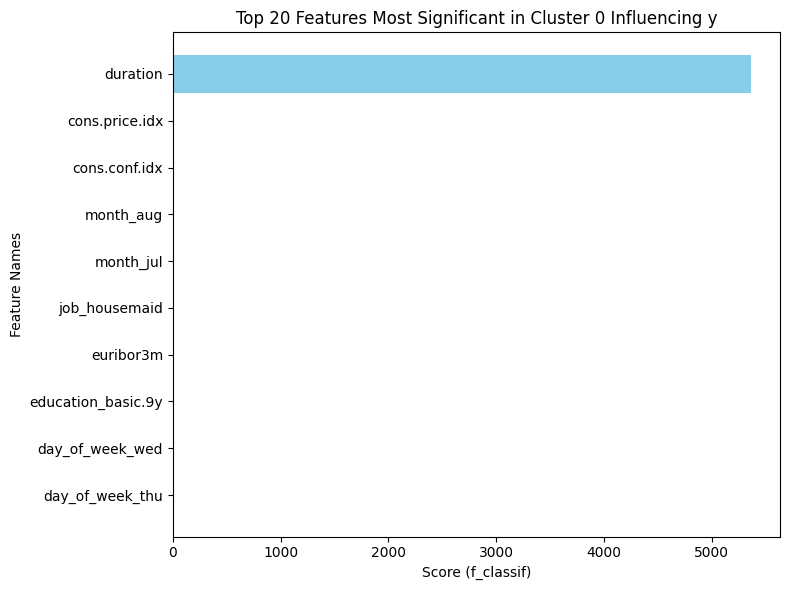

In [33]:
plot_top_features(c_0, 0)

C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1 13 46] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


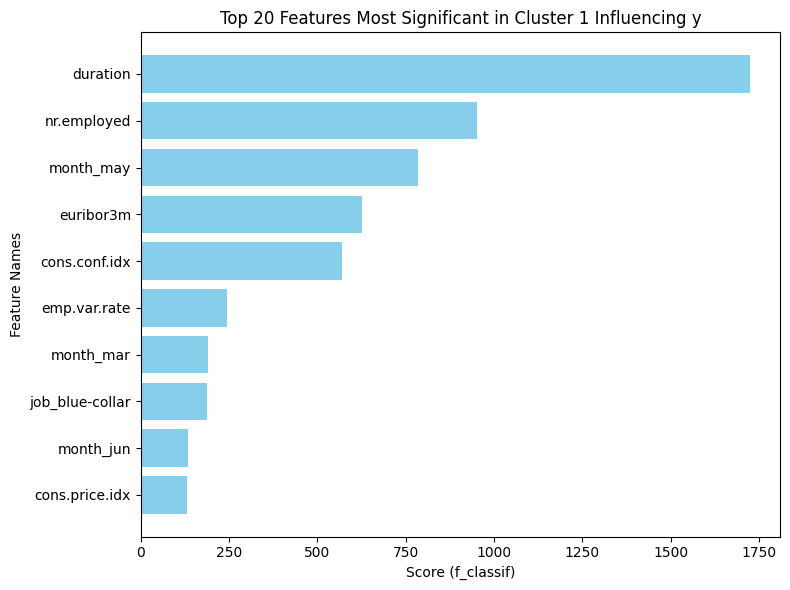

In [34]:
plot_top_features(c_1, 1)

C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1 13 40 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


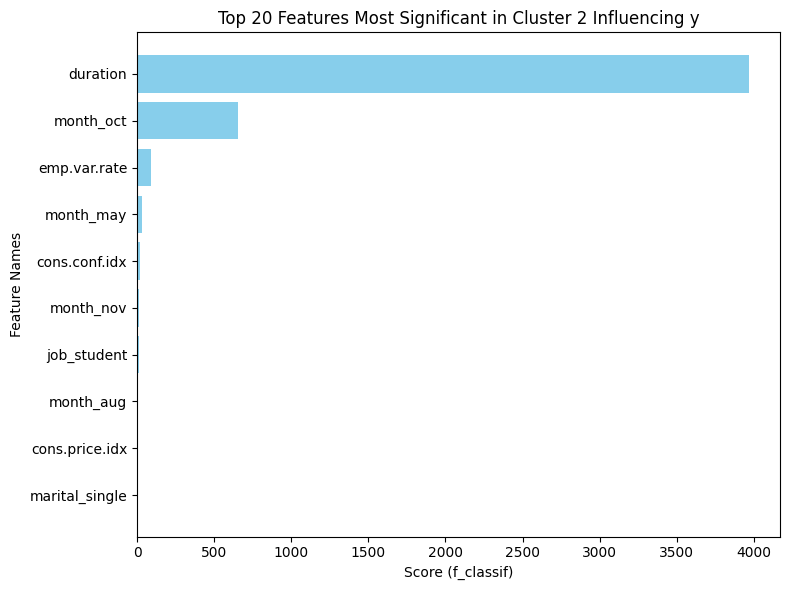

In [35]:
plot_top_features(c_2, 2)

C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1 45 46] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


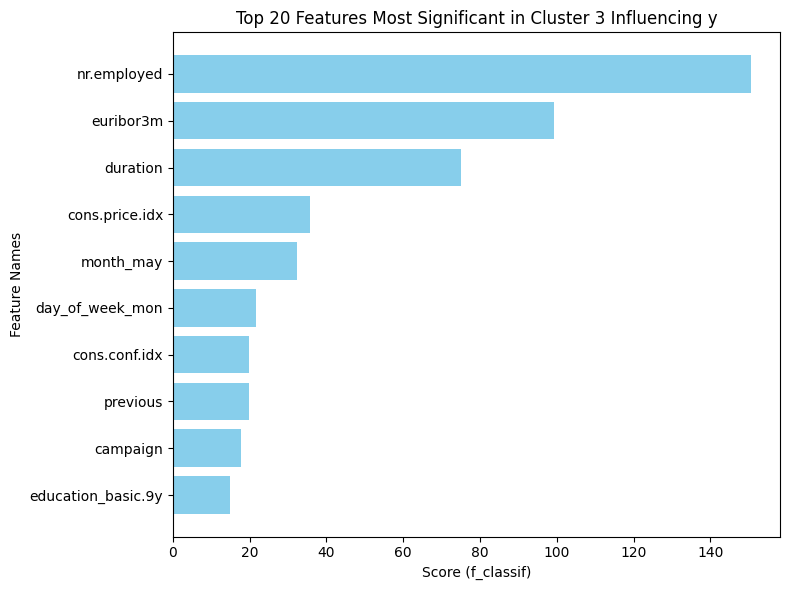

In [36]:
plot_top_features(c_3, 3)

C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1 13 46] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


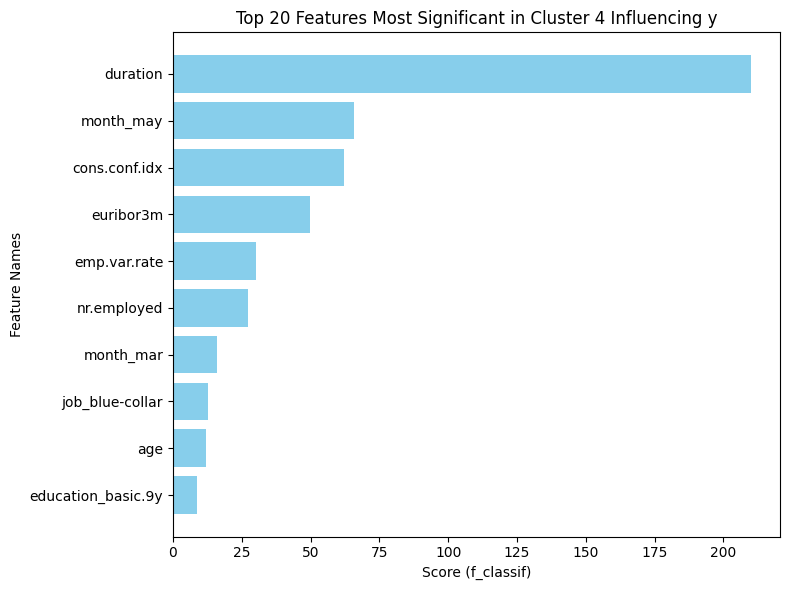

In [37]:
plot_top_features(c_4, 4)

C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 36 38 39 40 41 44 46] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\RASAMISON Lovatiana\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


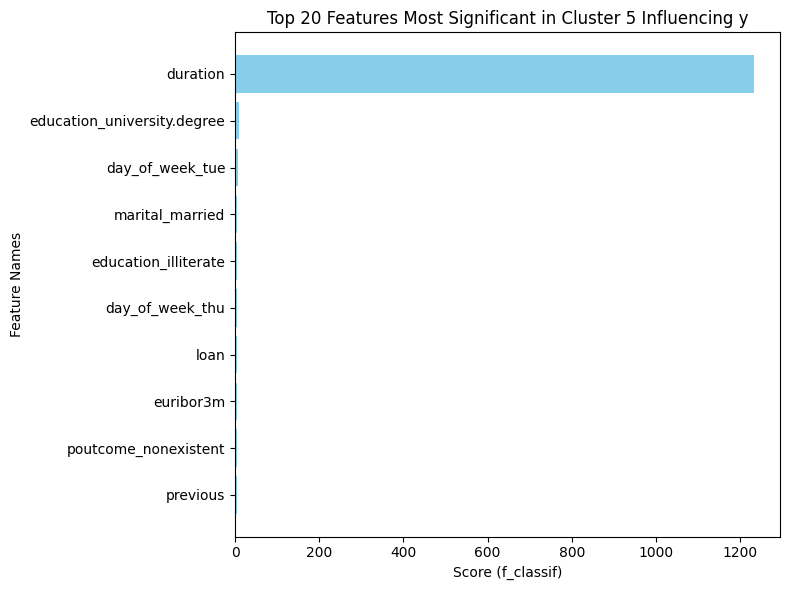

In [38]:
plot_top_features(c_5, 5)

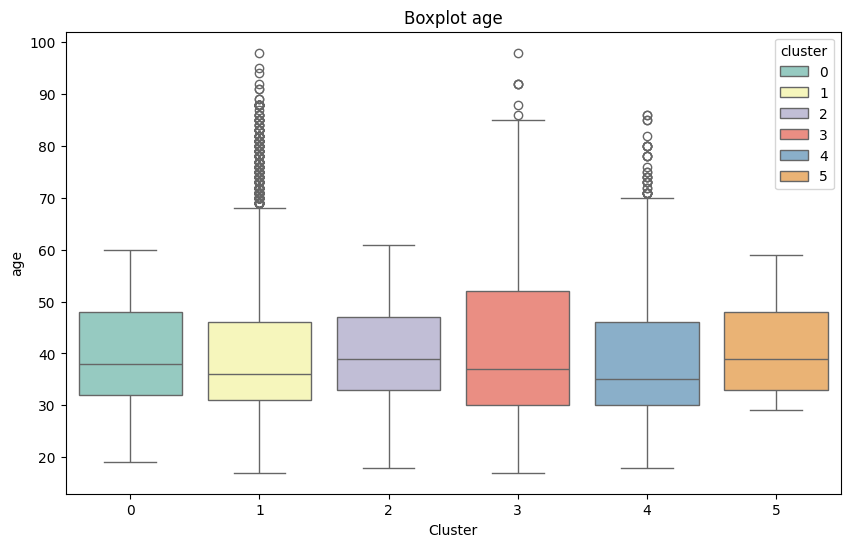

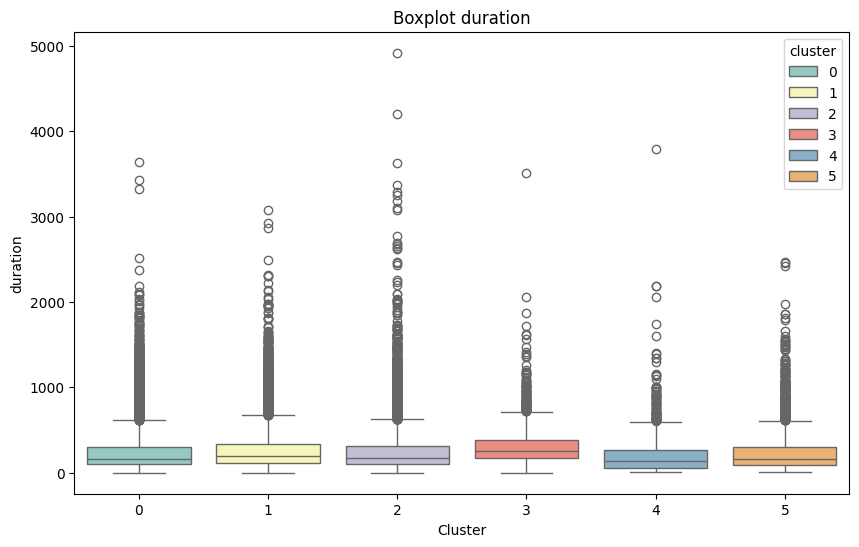

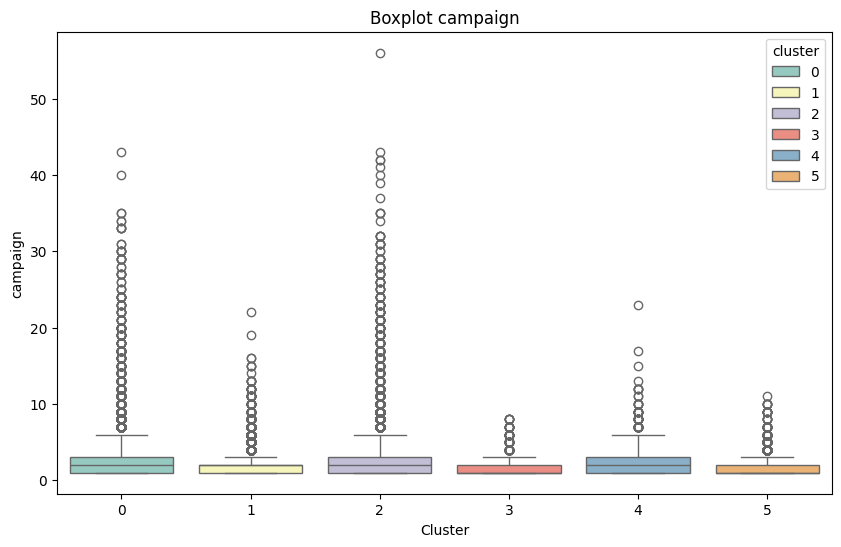

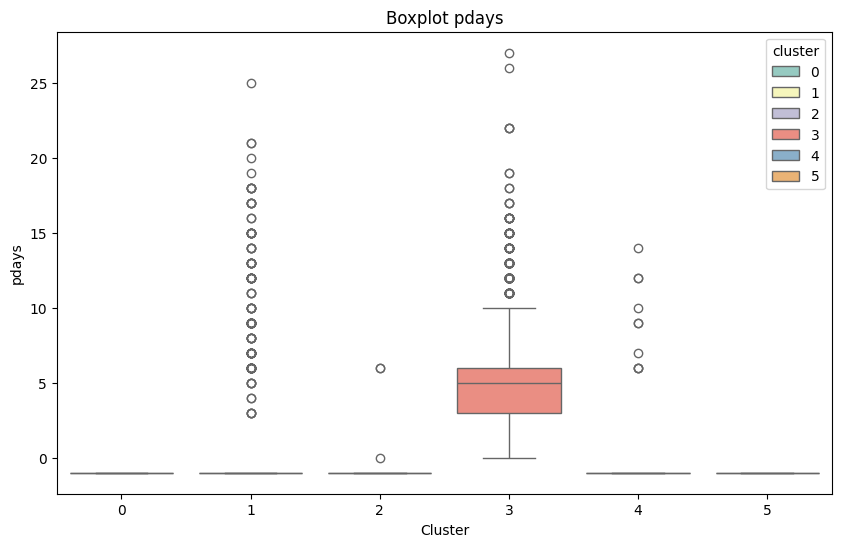

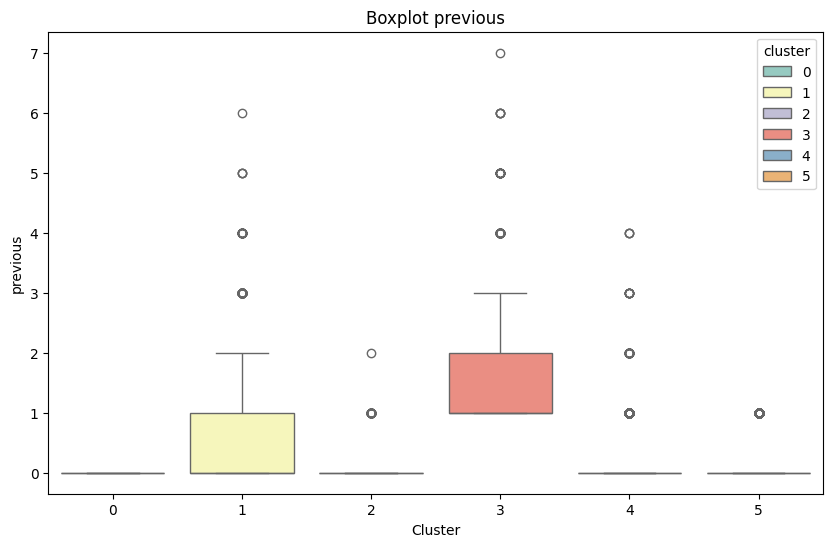

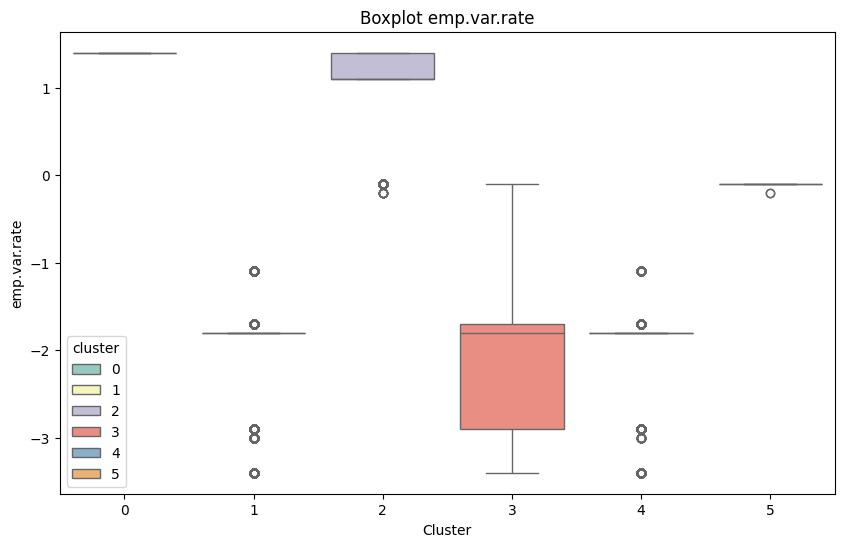

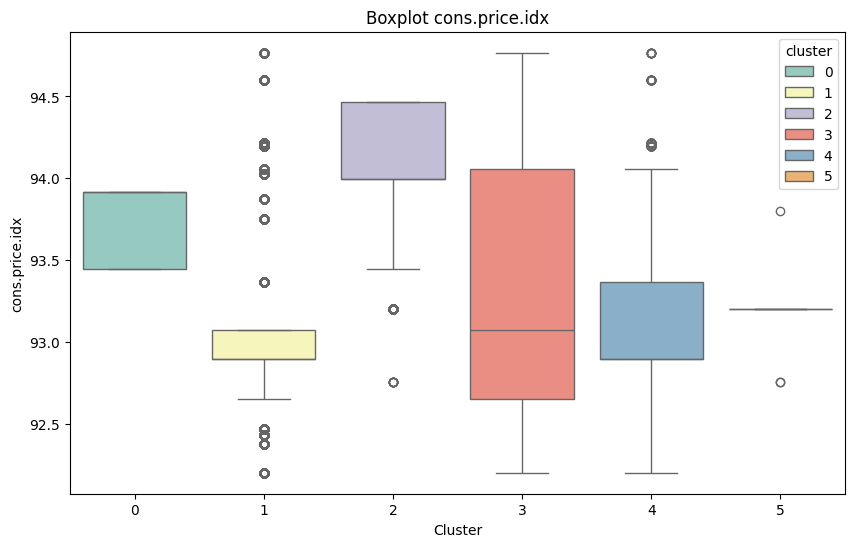

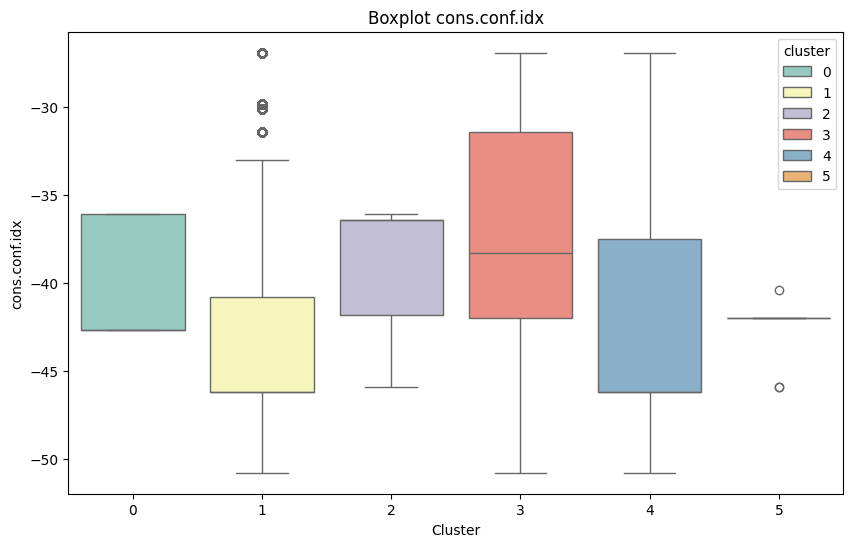

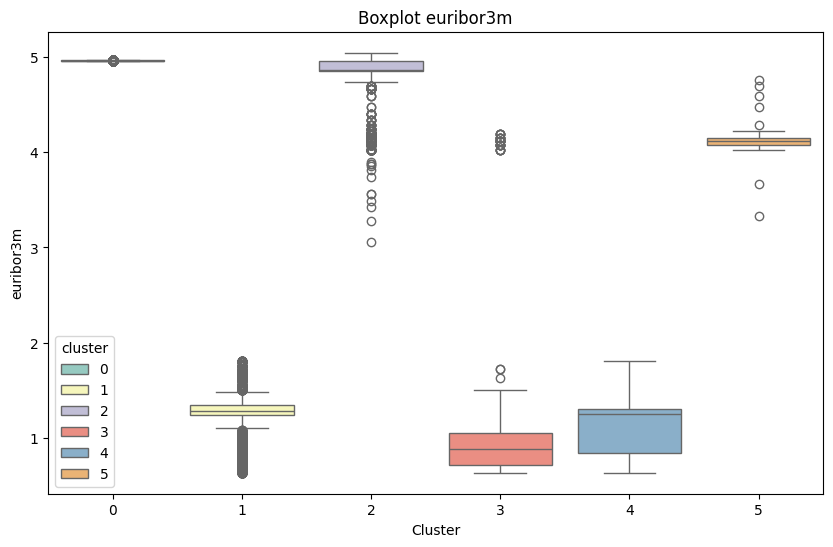

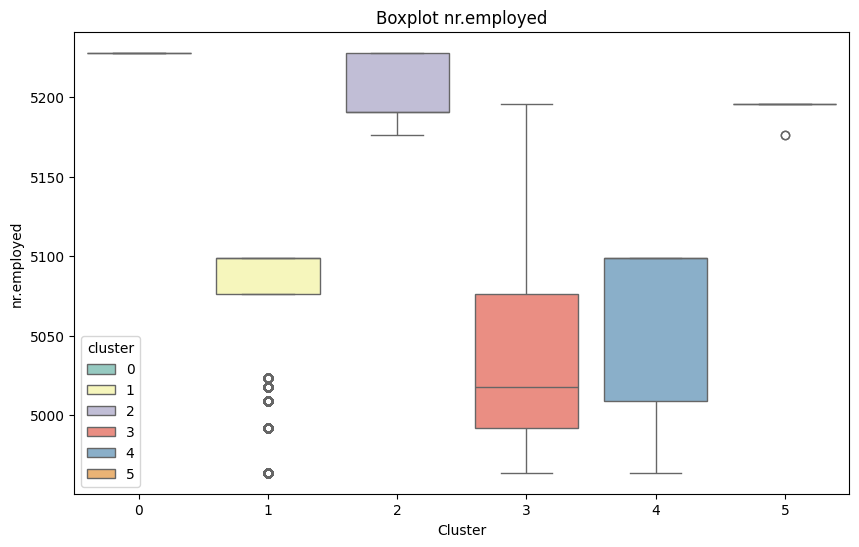

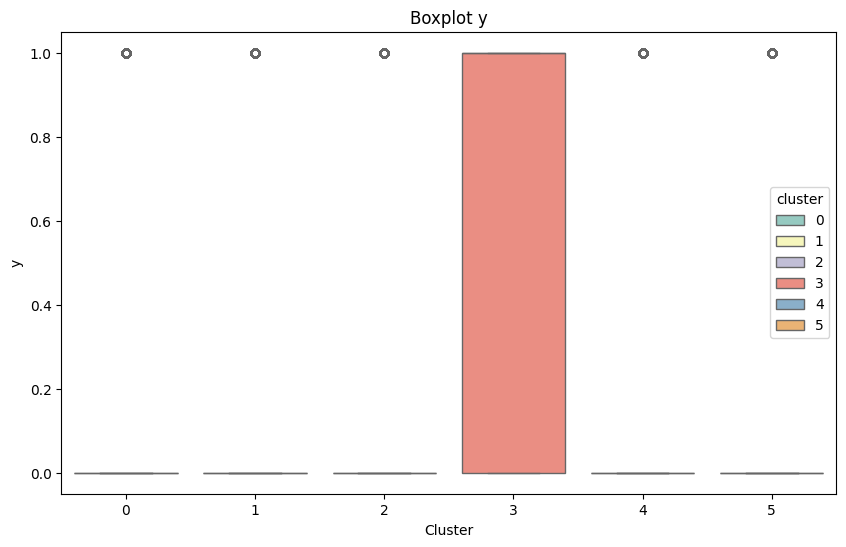

In [45]:
# boxplot des variables numeriques par rapport aux clusters
for col in var_num:  # Exclude the 'Cluster' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=col, hue = 'cluster', data=df_final, palette="Set3")
    plt.title(f'Boxplot {col}')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

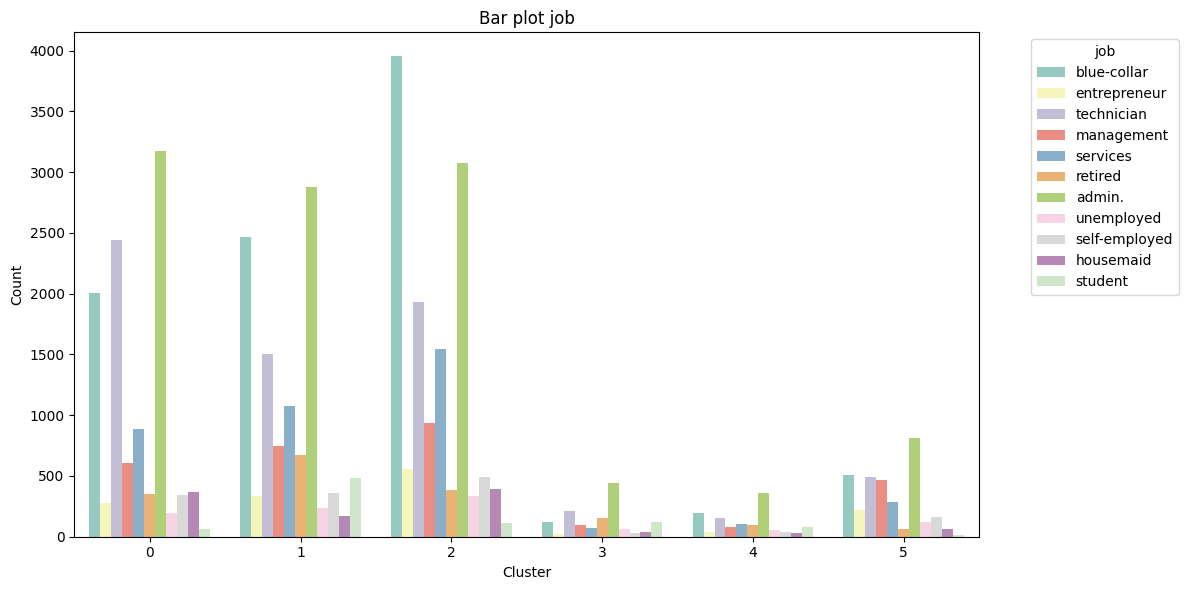

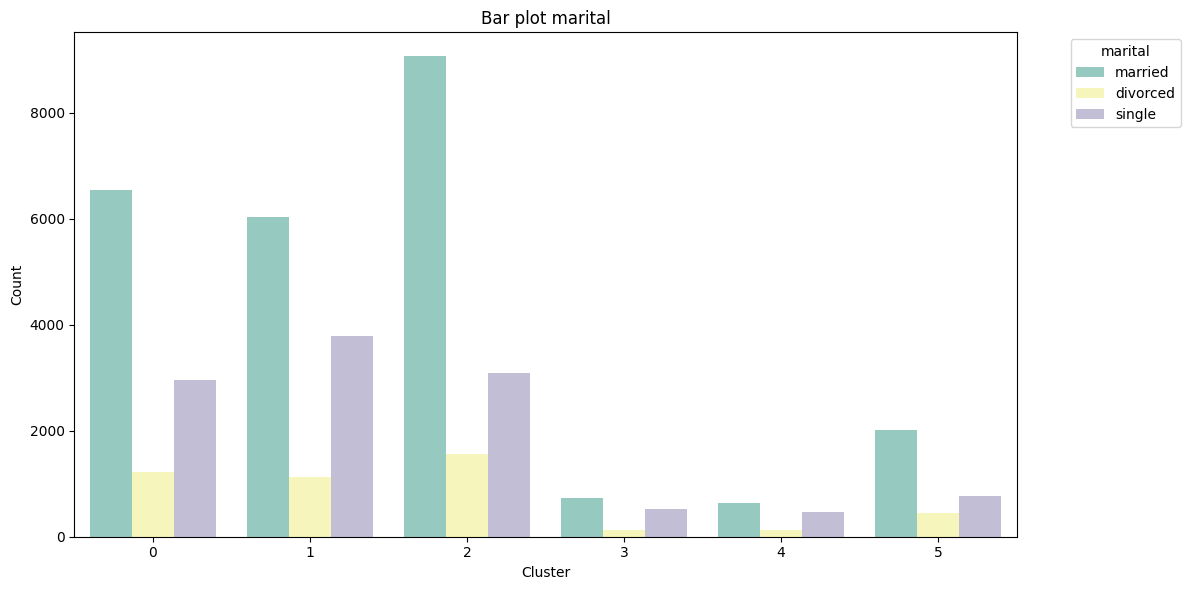

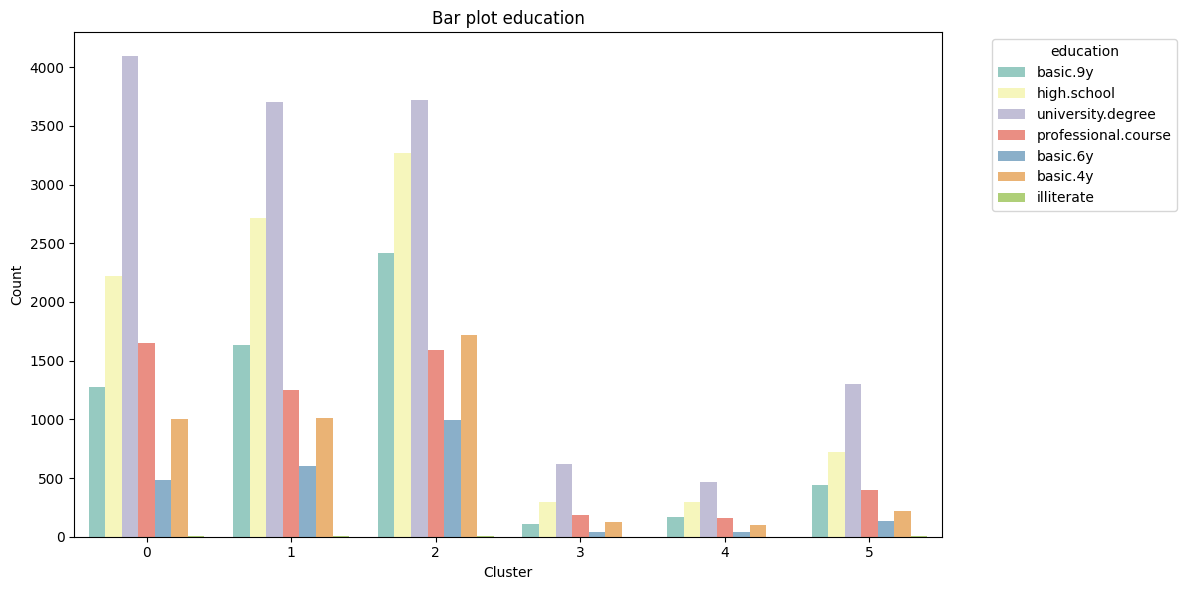

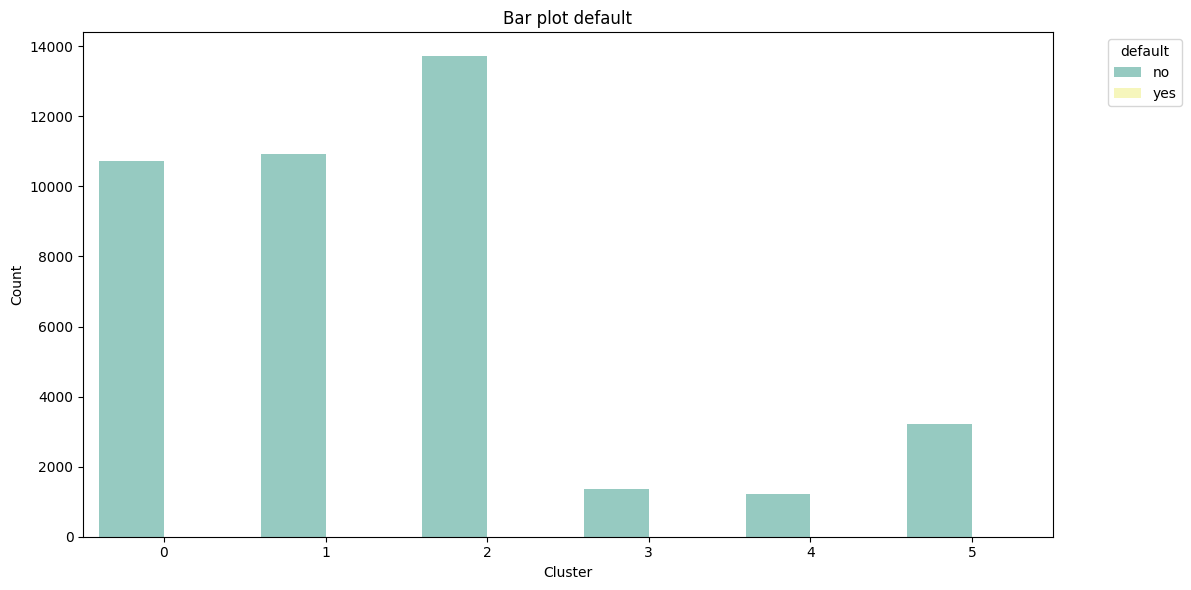

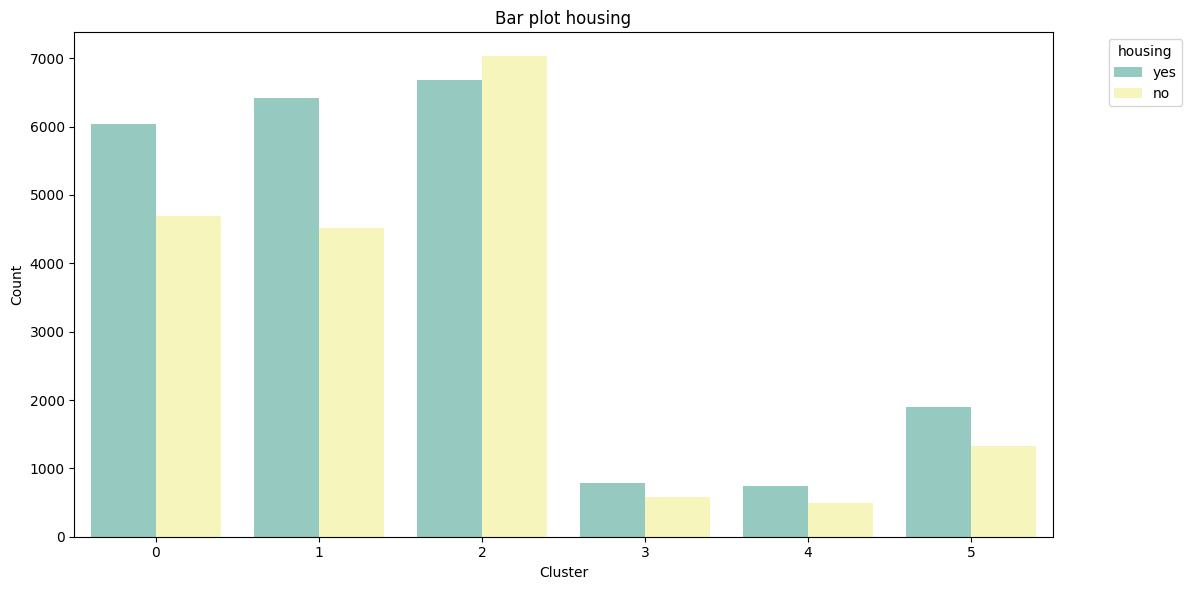

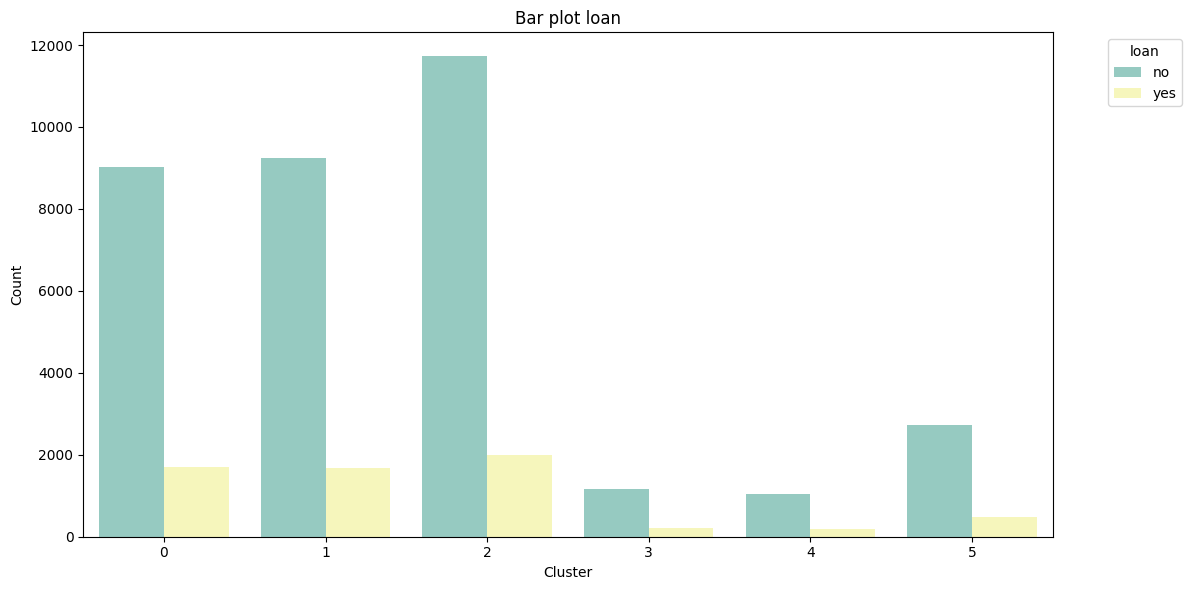

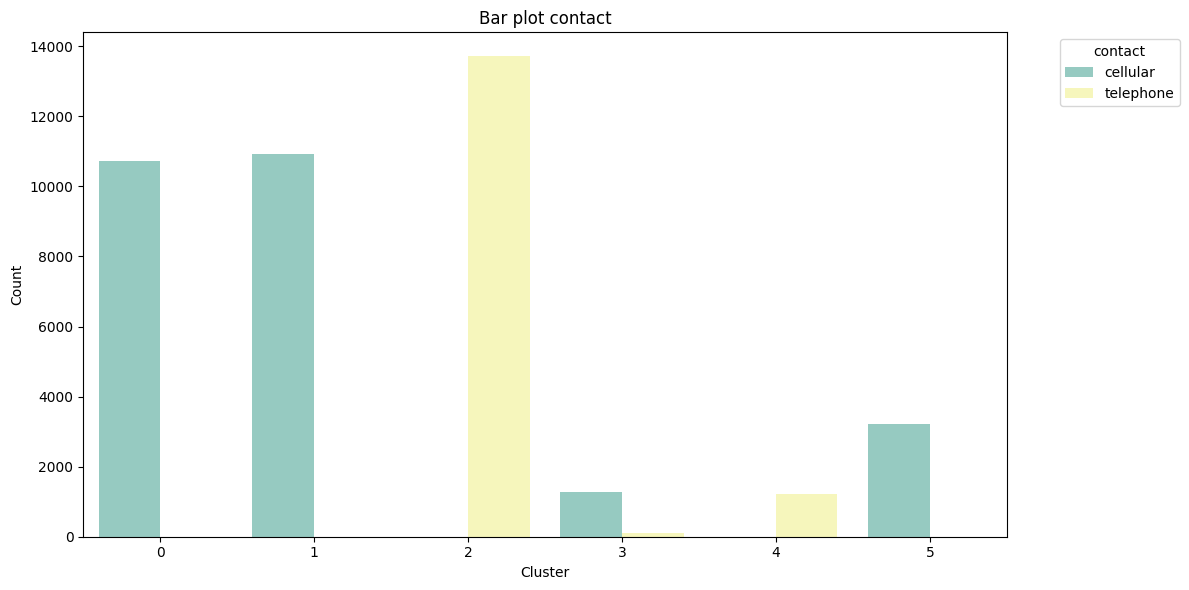

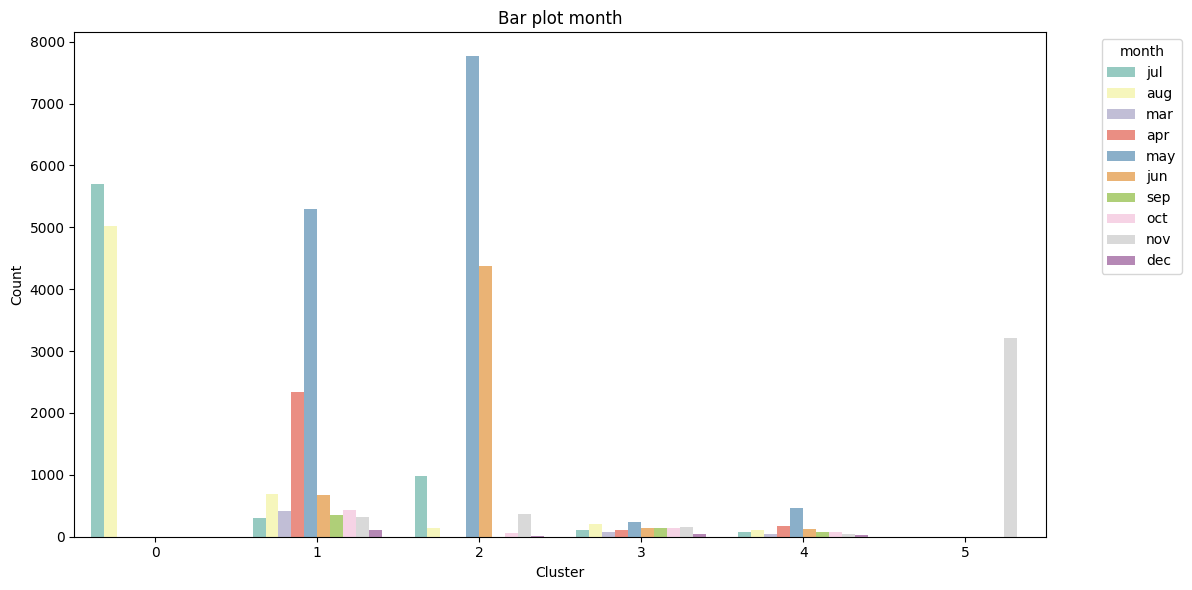

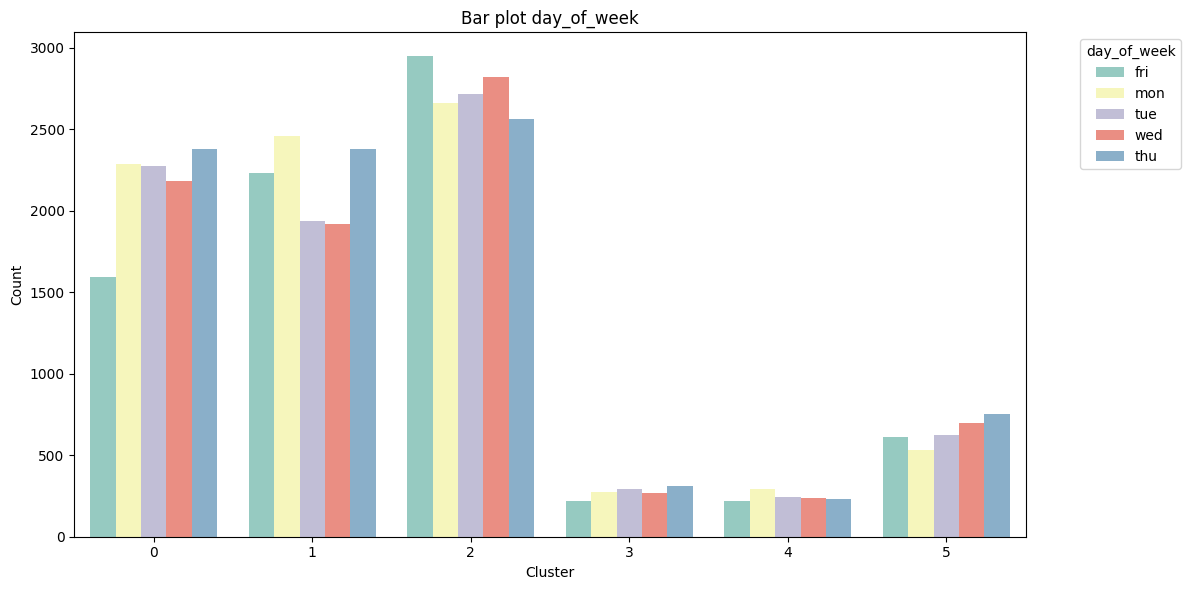

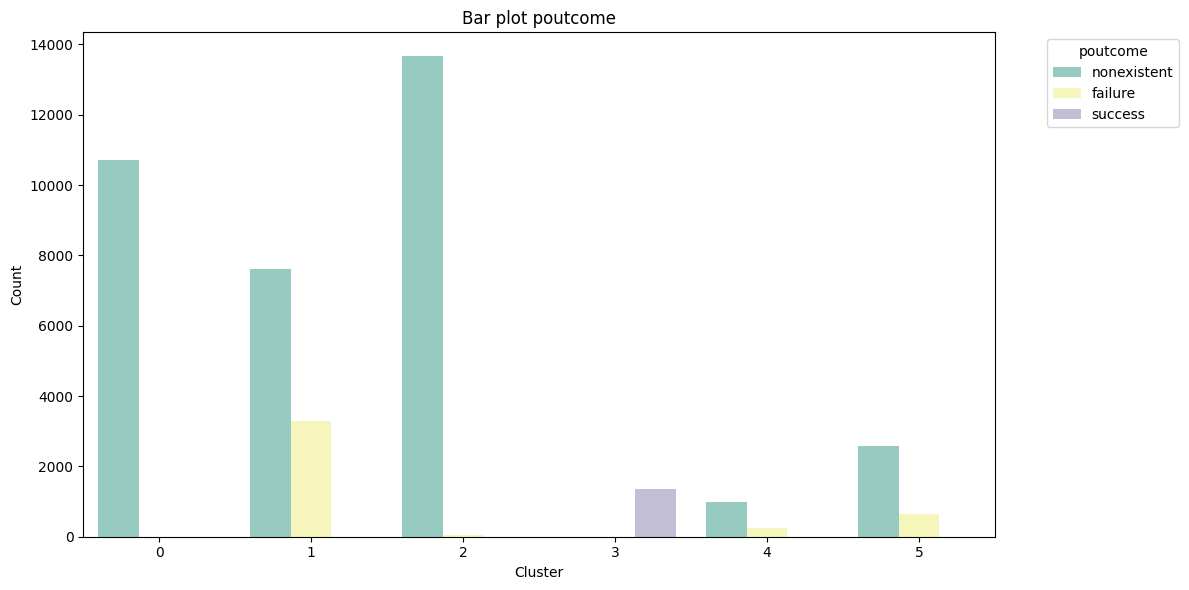

In [46]:
# Tracer des graphiques en barres pour chaque variable catégorielle par rapport aux clusters
for col in var_cat:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='cluster', hue=col, data=df_final, palette="Set3")
    plt.title(f'Bar plot {col}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Déplace la légende à l'extérieur
    plt.tight_layout()
    plt.show()
